Importando librerias necesarias

In [1]:
import yaml
import pandas as pd
import numpy as np

# MLFlow Libraries
import mlflow

# Plotting Libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Modeling Libraries
from keras.models import load_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

# Setting Parent Folder
%cd ..

# Local Functions
from src.data.data_transformation import data_transformer


print('Libraries loaded')

/Users/guvo/Library/CloudStorage/GoogleDrive-oskarguarneros@gmail.com/Mi unidad/Colab Notebooks/MNA/OPERACIONES DE APRENDIZAJE AUTOMÁTICO/itesm_tc5044_10_mlops_equipo22
Libraries loaded


/Users/guvo/Library/CloudStorage/GoogleDrive-oskarguarneros@gmail.com/Mi unidad/Colab Notebooks/MNA/OPERACIONES DE APRENDIZAJE AUTOMÁTICO/itesm_tc5044_10_mlops_equipo22/venv/lib/python3.11/site-packages/IPython/core/magics/osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


## 1 Config

In [2]:
with open('params.yaml') as conf_file:
    config = yaml.safe_load(conf_file)

print(config)

{'base': None, 'data': {'input_data': 'data/Steel_industry_data.csv'}, 'train': {'test_size': 0.2, 'random_state': 42, 'activation': 'relu', 'activation_2': 'softmax', 'optimizer': 'adam', 'loss': 'sparse_categorical_crossentropy', 'epochs': 50, 'batch_size': 10, 'verbose': 1, 'axis': -1}, 'reports': {'model': 'models/steel_industry_model.keras'}}


## 2 Load dataset

In [3]:
data = pd.read_csv(config['data']['input_data'])
data.head()

,date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type
0,01/01/2018 00:15,3.17,2.95,0.0,0.0,73.21,100.0,900,Weekday,Monday,Light_Load
1,01/01/2018 00:30,4.00,4.46,0.0,0.0,66.77,100.0,1800,Weekday,Monday,Light_Load
2,01/01/2018 00:45,3.24,3.28,0.0,0.0,70.28,100.0,2700,Weekday,Monday,Light_Load
3,01/01/2018 01:00,3.31,3.56,0.0,0.0,68.09,100.0,3600,Weekday,Monday,Light_Load
4,01/01/2018 01:15,3.82,4.50,0.0,0.0,64.72,100.0,4500,Weekday,Monday,Light_Load


Transforamción de Datos

In [4]:
data = data_transformer(data)
X = data[0]
y = data[1]

## 3 Training Model

In [5]:
type(config['train']['test_size'])
type(config['train']['random_state'])

int

In [6]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = config['train']['test_size'], random_state = config['train']['random_state'])

### 

## 4.2 Save MLFlow

In [7]:
mlflow.set_experiment("Steel_Industry_Classification")

<Experiment: artifact_location='file:///Users/guvo/Library/CloudStorage/GoogleDrive-oskarguarneros%40gmail.com/Mi%20unidad/Colab%20Notebooks/MNA/OPERACIONES%20DE%20APRENDIZAJE%20AUTOMA%CC%81TICO/itesm_tc5044_10_mlops_equipo22/mlruns/745342019068782582', creation_time=1729373303669, experiment_id='745342019068782582', last_update_time=1729373303669, lifecycle_stage='active', name='Steel_Industry_Classification', tags={}>

In [11]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

def train_and_log_model(model, model_name, X_train, X_test, y_train, y_test, params):
    with mlflow.start_run(run_name=model_name):
        # Train the model
        model.fit(X_train, y_train)
        # Make predictions
        y_pred = model.predict(X_test)
        # Calculate metrics
        acc = accuracy_score(y_test, y_pred)
        prec = precision_score(y_test, y_pred, average='weighted')
        rec = recall_score(y_test, y_pred, average='weighted')
        # Log parameters and metrics
        mlflow.log_params(params)
        mlflow.log_metrics({"accuracy": acc, "precision": prec, "recall": rec})
        # Log the model
        mlflow.sklearn.log_model(model, artifact_path="models")

## RandomForestClassifier

In [9]:
# RandomForestClassifier
mlflow.set_experiment("Steel_Industry_Classification")

<Experiment: artifact_location='file:///Users/guvo/Library/CloudStorage/GoogleDrive-oskarguarneros%40gmail.com/Mi%20unidad/Colab%20Notebooks/MNA/OPERACIONES%20DE%20APRENDIZAJE%20AUTOMA%CC%81TICO/itesm_tc5044_10_mlops_equipo22/mlruns/745342019068782582', creation_time=1729373303669, experiment_id='745342019068782582', last_update_time=1729373303669, lifecycle_stage='active', name='Steel_Industry_Classification', tags={}>

In [12]:
params_rf = {"n_estimators":150, "max_depth": 15, "random_state": 42}
model_rf = RandomForestClassifier(**params_rf)
train_and_log_model(
    model=model_rf,
    model_name="Random_Forest",
    X_train=X_train,
    X_test=X_test,
    y_train=y_train,
    y_test=y_test,
    params=params_rf
)

2024/10/20 11:35:16 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


In [13]:
params_knn = {"n_neighbors": 3, "weights": "uniform"}
model_knn = KNeighborsClassifier(**params_knn)
train_and_log_model(
    model=model_knn,
    model_name="KNeighbors",
    X_train=X_train,
    X_test=X_test,
    y_train=y_train,
    y_test=y_test,
    params=params_knn
)

2024/10/20 11:40:20 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


## 5.1 Model Prediction with MLFlow

In [14]:
run_id = "7af1a6585f98472c80e252bab23a9f7b"
logged_model = f'runs:/{run_id}/models'

# Load model as a sklearn model.
loaded_model = mlflow.sklearn.load_model(logged_model)

In [15]:
y_pred_loaded = loaded_model.predict(X_test)
acc_loaded = accuracy_score(y_test, y_pred_loaded)
print(f"Reproduced Accuracy: {acc_loaded}")

Reproduced Accuracy: 0.8778538812785388


In [16]:
# Query MLflow tracking server for experiment data
experiment_data = mlflow.search_runs(experiment_ids=['745342019068782582'])

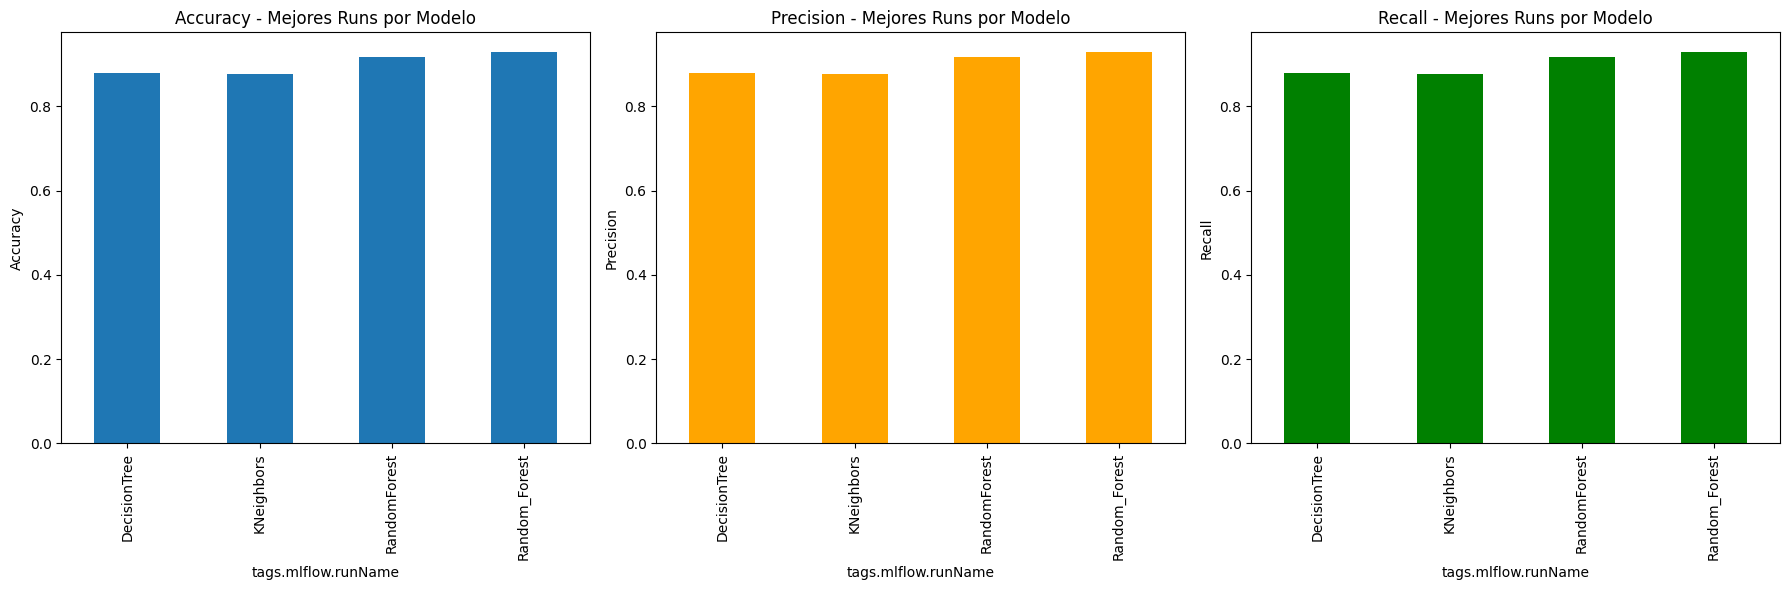

In [27]:
df_metrics = experiment_data[['tags.mlflow.runName', 'metrics.accuracy', 'metrics.precision', 'metrics.recall']]

# Filtrar los valores más altos de cada métrica por modelo
best_metrics_per_model = df_metrics.groupby('tags.mlflow.runName').max()

# Creamos una nueva figura para mostrar solo el run más alto de cada modelo
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Gráfico de accuracy por modelo (solo los más altos)
best_metrics_per_model['metrics.accuracy'].plot(kind='bar', ax=axes[0])
axes[0].set_title('Accuracy - Mejores Runs por Modelo')
axes[0].set_ylabel('Accuracy')

# Gráfico de precision por modelo (solo los más altos)
best_metrics_per_model['metrics.precision'].plot(kind='bar', ax=axes[1], color='orange')
axes[1].set_title('Precision - Mejores Runs por Modelo')
axes[1].set_ylabel('Precision')

# Gráfico de recall por modelo (solo los más altos)
best_metrics_per_model['metrics.recall'].plot(kind='bar', ax=axes[2], color='green')
axes[2].set_title('Recall - Mejores Runs por Modelo')
axes[2].set_ylabel('Recall')

# Ajustamos el layout para que los gráficos no se superpongan
plt.tight_layout()
plt.show()